In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv("./data/diabetes.csv")
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Checking Correlations

In [4]:
correlations = df.corr()
correlations[correlations > 0.25]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.544341,NaN
Glucose,NaN,1.000000,NaN,NaN,0.331357,NaN,NaN,0.263514,0.466581
BloodPressure,NaN,NaN,1.000000,NaN,NaN,0.281805,NaN,NaN,NaN
SkinThickness,NaN,NaN,NaN,1.000000,0.436783,0.392573,NaN,NaN,NaN
Insulin,NaN,0.331357,NaN,0.436783,1.000000,NaN,NaN,NaN,NaN
BMI,NaN,NaN,0.281805,0.392573,NaN,1.000000,NaN,NaN,0.292695
DiabetesPedigreeFunction,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Age,0.544341,0.263514,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
Outcome,NaN,0.466581,NaN,NaN,NaN,0.292695,NaN,NaN,1.000000


In [5]:
def visualizeCorr(data, x_col, y_col):
    fig, ax = plt.subplots()
    ax.scatter(data[x_col].values, data[y_col].values)

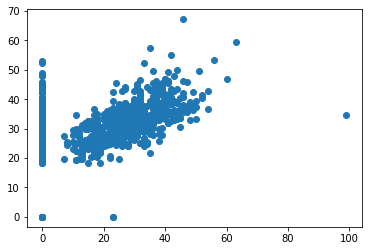

In [6]:
visualizeCorr(df, 'SkinThickness', 'BMI')

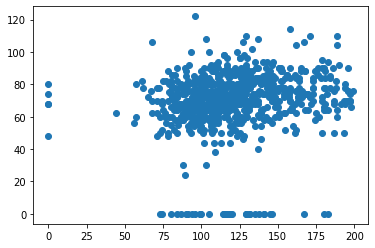

In [7]:
visualizeCorr(df, 'Glucose', 'BloodPressure')

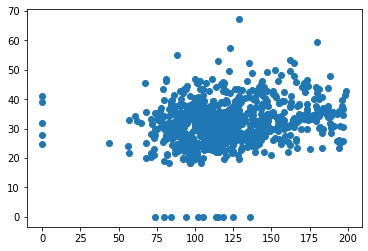

In [8]:
visualizeCorr(df, 'Glucose', 'BMI')

# Replacing the Zeros with Null values

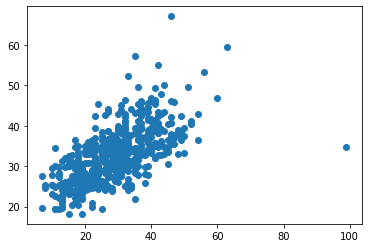

In [9]:
df[['SkinThickness', 'BMI']] = df[['SkinThickness', 'BMI']].replace(0, np.NaN)
df.dropna(inplace=True)
visualizeCorr(df, 'SkinThickness', 'BMI')

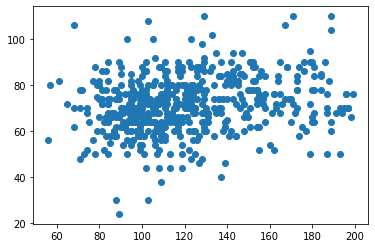

In [10]:
df[['Glucose', 'BloodPressure']] = df[['Glucose', 'BloodPressure']].replace(0, np.NaN)
df.dropna(inplace=True)
visualizeCorr(df, 'Glucose', 'BloodPressure')

In [11]:
df[['SkinThickness', 'BMI']]

,SkinThickness,BMI
0,35.0,33.6
1,29.0,26.6
3,23.0,28.1
4,35.0,43.1
6,32.0,31.0
...,...,...
761,31.0,44.0
763,48.0,32.9
764,27.0,36.8
765,23.0,26.2


In [12]:
for col in df.columns:
    print("Unique values in", col)
    print(df[col].unique())
    print('-----' * 3)

Unique values in Pregnancies
[ 6  1  0  3  2  5  9 11 10 13  4  7  8 15 17 12 14]
---------------
Unique values in Glucose
[148.  85.  89. 137.  78. 197. 189. 166. 118. 103. 115. 126. 119. 143.
 125.  97. 145. 109. 158.  88. 122. 102.  90. 111. 180. 106. 171.  71.
 101. 176. 150.  73. 187. 100. 105. 141.  99.  95. 146. 139. 129.  79.
 112. 113.  83. 110. 136. 107. 123.  81. 142. 144.  92.  93. 155. 160.
 162. 120. 117. 173. 170.  84.  96. 108. 154.  57. 156. 153. 152. 163.
 151. 114. 104. 134.  75. 179. 194. 181. 128. 196. 184. 147. 140. 177.
  87.  74. 164.  91. 165. 124.  86. 193. 191. 133.  77. 161.  80. 157.
 130.  61.  98. 116. 131. 127.  72. 172. 138.  94. 135.  82. 175. 132.
 195.  68. 186. 198. 121. 188. 174. 168. 167. 199.  56. 169. 149.  65.]
---------------
Unique values in BloodPressure
[ 72.  66.  40.  50.  70.  60.  84.  30.  88.  80.  94.  82.  75.  76.
  58.  78.  68.  64.  92. 110.  90.  74.  85.  86.  44.  65.  62.  48.
  56.  54.  52.  98.  55.  95.  46. 108. 102. 10

# Feature Selection

In [13]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction']].values

y = df[['Outcome']].values

# Standardization and Scaling of features

In [14]:
sc = StandardScaler()
X = sc.fit_transform(X)
print(X[:10])

[[ 0.75042054  0.87083814  0.04019626  0.5533269  -0.93569006  0.10324534
   0.36033064]
 [-0.7606458  -1.16338343 -0.44766104 -0.01734175 -0.93569006 -0.91498999
  -0.44147685]
 [-0.7606458  -1.0342265  -0.44766104 -0.58801039 -0.17079013 -0.69679671
  -0.97601517]
 [-1.06285907  0.5156566  -2.56170935  0.5533269   0.43136514  1.48513616
   5.18570108]
 [-0.15621926 -1.38940805 -1.74861385  0.26799257 -0.21961353 -0.27495635
  -0.7407021 ]
 [-0.45843253  2.45301047 -0.12242284  1.5044413   3.48282763 -0.34768745
  -1.00216107]
 [-0.7606458   2.19469662 -0.93551834 -0.58801039  5.94840933 -0.40587232
  -0.30493716]
 [ 0.44820727  1.4520443   0.04019626 -0.96845615  0.48832577 -1.03135975
   0.24412666]
 [-1.06285907 -0.0978388   1.01591087  1.69466418  0.93587361  1.87788408
   0.13954307]
 [-0.7606458  -0.58217727 -3.37480485  0.83866122 -0.26029969  1.5142286
  -0.92953358]]


In [15]:
mean = np.mean(X, axis=0)
print("Mean: (%d, %d)" % (mean[0], mean[1]))

Mean: (0, 0)


In [16]:
std_deviation = np.std(X, axis=0)
print("Standard Deviation: (%d, %d)" % (std_deviation[0], std_deviation[1]))

Standard Deviation: (1, 1)


# Train-Test Split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Logistic Regression Model

In [18]:
# instantiate model
logit = LogisticRegression()

In [19]:
# fit model with data
logit.fit(X_train, y_train)

/home/animathur/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/animathur/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
# Predictions
y_pred = logit.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0])

# Confusion Matrix

In [21]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[89, 11],
       [22, 38]])

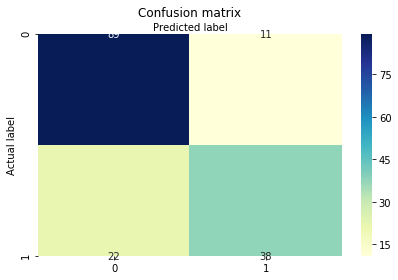

In [22]:
class_names = [0, 1] # name of classes in target variable
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), cmap='YlGnBu', fmt='g', annot=True)
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.tight_layout()


# Performance

In [23]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

Accuracy:  0.79375
Precision:  0.7755102040816326
Recall:  0.6333333333333333


In [24]:
y_pred_proba = logit.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

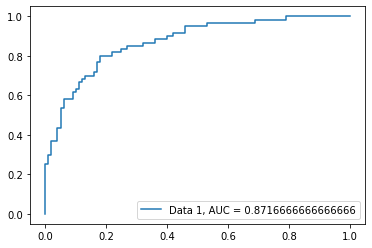

In [25]:
plt.plot(fpr, tpr, label="Data 1, AUC = "+str(auc))
plt.legend(loc=4)
plt.show()